# Liver Disease - Prediction (Classification)

Though its a non graded practice, lets try to get a better understanding

In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [261]:
url = 'https://raw.githubusercontent.com/dphi-official/Datasets/master/liver_patient_data/indian_liver_patient_dataset.csv'
healthData = pd.read_csv(url)
#create duplicate copy
data = healthData.copy()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
Age                           500 non-null int64
Gender                        500 non-null object
Total_Bilirubin               500 non-null float64
Direct_Bilirubin              500 non-null float64
Alkaline_Phosphotase          500 non-null int64
Alamine_Aminotransferase      500 non-null int64
Aspartate_Aminotransferase    500 non-null int64
Total_Protiens                500 non-null float64
Albumin                       500 non-null float64
Albumin_and_Globulin_Ratio    496 non-null float64
Liver_Problem                 500 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 43.1+ KB


Except for **Gender** all of the features are number based and except for **Liver_Problem** all seems to be continuous numbers. **Albumin_and_Globulin_Ratio** seems to have 4 missing values. Lets fill it with median value.

In [262]:
data.Albumin_and_Globulin_Ratio.fillna(data.Albumin_and_Globulin_Ratio.median(),axis=0,inplace=True)

### EDA

In [263]:
# sns.pairplot(data,hue = 'Liver_Problem')

From the pair plot we can see features like **Direct_Bilirubin, Alkaline_Phosphotase, and Alamine_Aminotransferase** seem to have some distinct correlation. Lets see if there are improvement on age if its binned.



In [264]:
data.Age.describe()

count    500.0000
mean      44.5860
std       16.5334
min        4.0000
25%       32.7500
50%       45.0000
75%       58.0000
max       85.0000
Name: Age, dtype: float64

In [265]:
# X = data.drop(['Liver_Problem',"Age"],axis=1)

Lets bin the age

In [266]:
data['Age_band'] = pd.qcut(data['Age'],q=10,precision=0)
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem,Age_band
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,"(60.0, 66.0]"
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,"(60.0, 66.0]"
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,"(60.0, 66.0]"
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,"(55.0, 60.0]"
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,"(66.0, 85.0]"


In [267]:
# pd.crosstab([data.Gender,data.Liver_Problem],data.Age_band,margins=True).style.background_gradient(cmap='summer_r')

It can be seen in **men, the possibility of having liver problem is higher amonsgt higher age_band, while women have slightly lower age_band**. Also **women have a huge variance in age_band vs liver problem**. Its not relatively clear as in the case of men.

Men have more affected case than women, but this may be due to less data. Also heavily affected age group seems to be from band 3 and above in both cases, with majority falling between 3-7

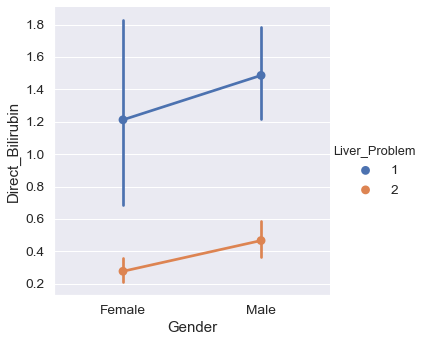

In [268]:
sns.catplot('Gender','Direct_Bilirubin',hue='Liver_Problem',data=data,kind='point')

This categorical plot clearly shows, **higher the direct bilirubin higher the chances of liver_problem**. Also Men generally have slightly higher Bilirubin in both cases

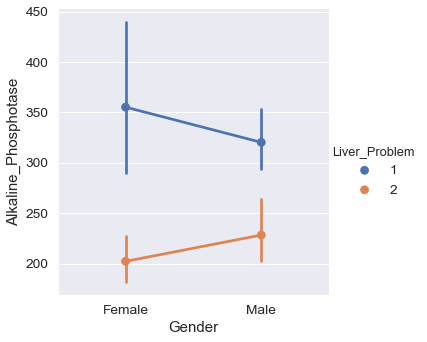

In [269]:
sns.catplot('Gender','Alkaline_Phosphotase',hue='Liver_Problem',data=data,kind='point')

In this case of **Alkaline_Phosphotase** we can see men are more susceptible to increase in its value. But since women's data has a huge variance it could also be because of less data. But intutively we could still maintain that there is a positive correlation.


Lets try a few combinations of features to see how it impacts our model.
>    - All features
>        - Unscaled
>        - Scaled
>    - Drop features (Age,Total Bilirubin, Alamine_Aminotransferase,etc)
>        - Unscaled
>        - Scaled
        

In [270]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Liver_Problem', 'Age_band'],
      dtype='object')

In [271]:
# data.drop(['Age','Total_Bilirubin'],axis=1,inplace=True)
# temp = data.drop(['Age_band','Liver_Problem'],axis=1)
# # data.columns
# numCols = temp.select_dtypes(np.number).columns
# numCols[:len(data.columns)-1]

### Model Preparation

Prepare dataframes with features to be dropped

In [272]:
temp = data.drop(['Age_band','Liver_Problem'],axis=1)
# data.columns
numCols = temp.select_dtypes(np.number).columns
numCols

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio'],
      dtype='object')

#### One Hot Encoding

In [274]:
data = pd.get_dummies(data,columns=['Gender','Age_band'],drop_first=True)

In [276]:
numCols = ['Age','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase',
           'Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens',
           'Albumin','Albumin_and_Globulin_Ratio']

In [277]:
data.shape

(500, 20)

In [304]:
toDrop = ['Age','Total_Bilirubin','Albumin','Total_Protiens']

dataDropped = data.drop(toDrop,axis=1)

rem = sorted(list(set(data.columns)-set(toDrop)))
temp = rem[9:]
temp.pop(-1)
rem = temp
rem

['Alamine_Aminotransferase',
 'Albumin_and_Globulin_Ratio',
 'Alkaline_Phosphotase',
 'Aspartate_Aminotransferase',
 'Direct_Bilirubin',
 'Gender_Male']

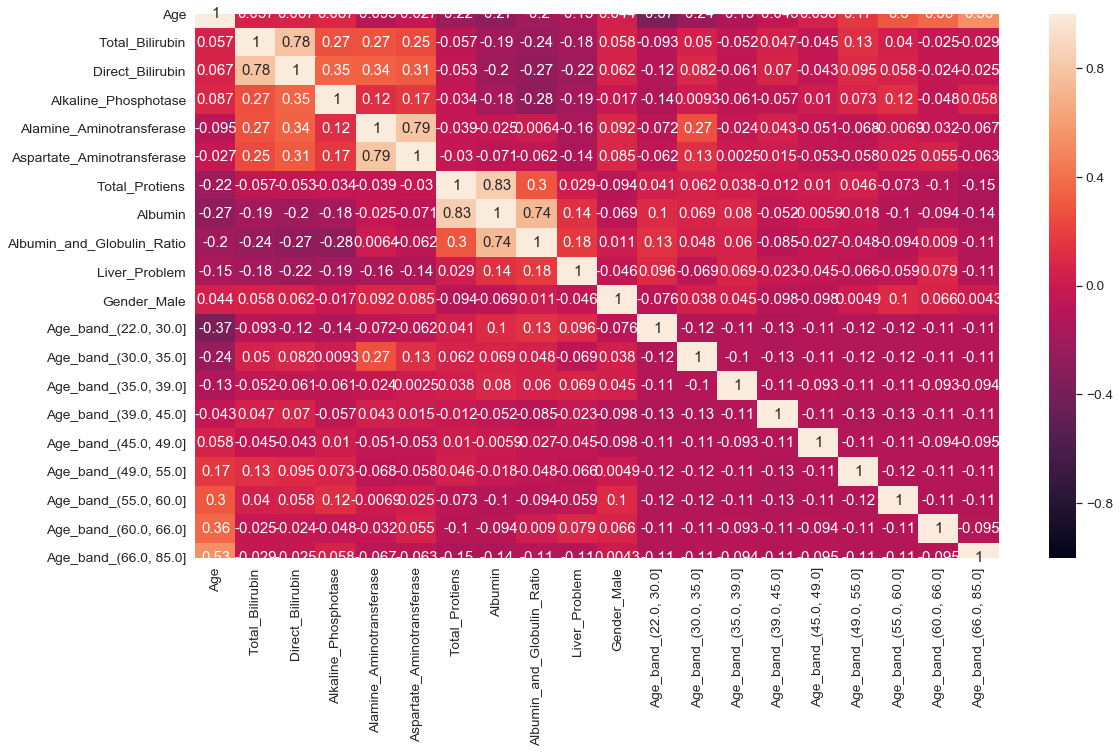

In [280]:
fig = plt.figure(figsize=(18,10))
sns.set(font_scale=1.25)
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1)

### Logistic Regression

In [282]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score,matthews_corrcoef,f1_score,r2_score,confusion_matrix
from sklearn.metrics import accuracy_score

Planning to do multiple kinds of inputs(combination of all features/scaled/power transformation), for different classification models (Logistic Regression, Decision Tree Classifier and Random Forest Tree)

In [283]:
#Metrics function
def metricsEval(y_test,y_pred,xtrain,y_train,model):
    
    tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()

    test_acc = accuracy_score(y_test,y_pred)
    train_acc = accuracy_score(y_train,model.predict(xtrain))
    
    specificity = tn/float((tn+fp))
    sensitivity = tp/float(tp+fn)
    mCorr = matthews_corrcoef(y_test,y_pred)
    F1Score = f1_score(y_test,y_pred)
    R2Score = r2_score(y_test,y_pred)
    
    res = [train_acc,test_acc,tp,tn,fp,fn,sensitivity,specificity,mCorr,F1Score,R2Score]
    
    return res

In [306]:
ts=0.3
rs=21
#data

##no feature removal
###no scaling
X = data.drop(['Liver_Problem'],axis=1)
y = data.Liver_Problem
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=ts,random_state=rs)
case0 = [X_train,X_test,y_train,y_test]

###no feature removal
###nscaling
XScaled = data.drop(['Liver_Problem'],axis=1)
y = data["Liver_Problem"]
from sklearn.preprocessing import StandardScaler,RobustScaler
scaler = RobustScaler()
XScaled[numCols]= pd.DataFrame(scaler.fit_transform(XScaled[numCols]),columns =numCols)

Xs_train,Xs_test,ys_train,ys_test = train_test_split(XScaled,y,test_size=ts,random_state=rs)
case1 = [Xs_train,Xs_test,ys_train,ys_test]

##feature removal
###no scaling
XDropped = dataDropped.drop(['Liver_Problem'],axis=1)
y = dataDropped.Liver_Problem

X3_train,X3_test,y3_train,y3_test = train_test_split(XDropped,y,test_size=ts,random_state=rs)
case2 = [X3_train,X3_test,y3_train,y3_test]

##feature removal
###scaling
XDroppedScaled = dataDropped.drop(['Liver_Problem'],axis=1)
y = data["Liver_Problem"]

XDroppedScaled[rem]= pd.DataFrame(scaler.fit_transform(XDroppedScaled[rem]),columns=rem)

Xs4_train,Xs4_test,ys4_train,ys4_test = train_test_split(XDroppedScaled,y,test_size=ts,random_state=rs)
case3 = [Xs4_train,Xs4_test,ys4_train,ys4_test]


##############
from sklearn.preprocessing import PowerTransformer
pow_trans = PowerTransformer()

XDroppedScaledPtransform = dataDropped.drop(['Liver_Problem'],axis=1)
y = data["Liver_Problem"]
XDroppedScaledPtransform[rem] = pow_trans.fit_transform(XDroppedScaledPtransform[rem])
Xs5_train,Xs5_test,ys5_train,ys5_test = train_test_split(XDroppedScaledPtransform,y,test_size=ts,random_state=rs)
case4 = [Xs5_train,Xs5_test,ys5_train,ys5_test]

##############

##final list
cases = [case0,case1,case2,case3,case4]
caseNames_LR = ['LR - Unscaled', 'LR - Scaled','LR(features mod) - Unscaled','LR(features mod) - Scaled','LR(features mod) - Ptrnsf']
caseNames_DTC = ['DCT - Unscaled', 'DCT - Scaled','DCT(features mod) - Unscaled','DCT(features mod) - Scaled','DCT(features mod) - Ptrnsf']
caseNames_RFT = ['RFT - Unscaled', 'RFT - Scaled','RFT(features mod) - Unscaled','RFT(features mod) - Scaled','RFT(features mod) - Ptrnsf']

   Direct_Bilirubin  Alkaline_Phosphotase  Alamine_Aminotransferase  \
0         -1.218583             -0.419783                 -1.397008   
1          1.808388              1.729358                  0.736448   
2          1.740019              1.340666                  0.667889   
3         -0.096069             -0.489969                 -1.692075   
4          1.427438             -0.314049                 -0.409013   

   Aspartate_Aminotransferase  Albumin_and_Globulin_Ratio  Gender_Male  \
0                   -1.281417                   -0.136625    -1.704773   
1                    0.932874                   -0.730941     0.586588   
2                    0.577603                   -0.172219     0.586588   
3                   -1.090242                    0.208972     0.586588   
4                    0.429265                   -2.208561     0.586588   

   Age_band_(22.0, 30.0]  Age_band_(30.0, 35.0]  Age_band_(35.0, 39.0]  \
0                      0                      0       

Add all the parameters to be tuned to obtain best estimator for each variant of models

In [302]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

paramsToTune_LR={'class_weight':[None,"balanced"],'fit_intercept':[True,False],'penalty':['l1','l2'],'C':range(1,11)}
paramsToTune_DTC={'max_depth':range(3,8)}

n_estimators = [int(x) for x in np.linspace(start = 1, stop = 110, num = 1)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 30, num = 1)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
paramsToTune_RFT = {'n_estimators': n_estimators,
                    'max_features': max_features,
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split,
                    'min_samples_leaf': min_samples_leaf,
                    'bootstrap': bootstrap,
                    'criterion': ['gini', 'entropy']}


from sklearn.model_selection import GridSearchCV

resultModel = pd.DataFrame(index=['Training Accuracy','Testing Accuracy',
                                  'True Positives','True Negatives','False Positives',
                                  'False Negatives','Sensitivity','Specificity',
                                  'Matthews score','F1 score','R2 score'])
models = []

def modelling(mlName,params,cNames):
    
    for i in range(len(cNames)):
        modelName = 'logFit_0'+str(i)
        predName = 'y_pred_0'+str(i)
        resName = 'res_0'+str(i)
        
        if mlName == 'LR':
            modelName = 'logFit_0'+str(i)
            predName = 'y_pred_0'+str(i)
            resName = 'res_0'+str(i)
            
            modelName = LogisticRegression()
            
        elif mlName == 'DTC':
            modelName = 'treeFit_0'+str(i)
            predName = 'tree_y_pred_0'+str(i)
            resName = 'tree_res_0'+str(i)
            
            modelName = DecisionTreeClassifier()
            
        elif mlName == 'RFT':
            modelName = 'forestFit_0'+str(i)
            predName = 'forest_y_pred_0'+str(i)
            resName = 'forest_res_0'+str(i)
            modelName = RandomForestClassifier()
        
        modelName.fit(cases[i][0],cases[i][2])

        grid = GridSearchCV(modelName,params,cv=3)
        grid.fit(X_train,y_train)
        modelName = grid.best_estimator_
        modelName.fit(cases[i][0],cases[i][2])

        predName = modelName.predict(cases[i][1])

        resName = metricsEval(cases[i][3],predName,cases[i][0],cases[i][2],modelName)

        resultModel[cNames[i]] = resName
        models.append(modelName)

In [307]:
modelling('LR',paramsToTune_LR,caseNames_LR)
resultModel

,LR - Unscaled,LR - Scaled,LR(features mod) - Unscaled,LR(features mod) - Scaled,LR(features mod) - Ptrnsf
Training Accuracy,0.708571,0.714286,0.700000,0.711429,0.720000
Testing Accuracy,0.720000,0.726667,0.713333,0.713333,0.766667
True Positives,12.000000,14.000000,10.000000,10.000000,18.000000
True Negatives,96.000000,95.000000,97.000000,97.000000,97.000000
False Positives,14.000000,15.000000,13.000000,13.000000,13.000000
False Negatives,28.000000,26.000000,30.000000,30.000000,22.000000
Sensitivity,0.300000,0.350000,0.250000,0.250000,0.450000
Specificity,0.872727,0.863636,0.881818,0.881818,0.881818
Matthews score,0.201785,0.239227,0.161784,0.161784,0.362387
F1 score,0.820513,0.822511,0.818565,0.818565,0.847162


In [308]:
modelling('DTC',paramsToTune_DTC,caseNames_DTC)
resultModel

,LR - Unscaled,LR - Scaled,LR(features mod) - Unscaled,LR(features mod) - Scaled,LR(features mod) - Ptrnsf,DCT - Unscaled,DCT - Scaled,DCT(features mod) - Unscaled,DCT(features mod) - Scaled,DCT(features mod) - Ptrnsf
Training Accuracy,0.708571,0.714286,0.700000,0.711429,0.720000,0.845714,0.845714,0.740000,0.762857,0.780000
Testing Accuracy,0.720000,0.726667,0.713333,0.713333,0.766667,0.633333,0.626667,0.626667,0.720000,0.720000
True Positives,12.000000,14.000000,10.000000,10.000000,18.000000,19.000000,19.000000,30.000000,5.000000,6.000000
True Negatives,96.000000,95.000000,97.000000,97.000000,97.000000,76.000000,75.000000,64.000000,103.000000,102.000000
False Positives,14.000000,15.000000,13.000000,13.000000,13.000000,34.000000,35.000000,46.000000,7.000000,8.000000
False Negatives,28.000000,26.000000,30.000000,30.000000,22.000000,21.000000,21.000000,10.000000,35.000000,34.000000
Sensitivity,0.300000,0.350000,0.250000,0.250000,0.450000,0.475000,0.475000,0.750000,0.125000,0.150000
Specificity,0.872727,0.863636,0.881818,0.881818,0.881818,0.690909,0.681818,0.581818,0.936364,0.927273
Matthews score,0.201785,0.239227,0.161784,0.161784,0.362387,0.153487,0.144474,0.293497,0.100025,0.117468
F1 score,0.820513,0.822511,0.818565,0.818565,0.847162,0.734300,0.728155,0.695652,0.830645,0.829268


In [309]:
modelling('RFT',paramsToTune_RFT,caseNames_RFT)
resultModel

,LR - Unscaled,LR - Scaled,LR(features mod) - Unscaled,LR(features mod) - Scaled,LR(features mod) - Ptrnsf,DCT - Unscaled,DCT - Scaled,DCT(features mod) - Unscaled,DCT(features mod) - Scaled,DCT(features mod) - Ptrnsf,RFT - Unscaled,RFT - Scaled,RFT(features mod) - Unscaled,RFT(features mod) - Scaled,RFT(features mod) - Ptrnsf
Training Accuracy,0.708571,0.714286,0.700000,0.711429,0.720000,0.845714,0.845714,0.740000,0.762857,0.780000,0.742857,0.685714,0.685714,0.694286,0.697143
Testing Accuracy,0.720000,0.726667,0.713333,0.713333,0.766667,0.633333,0.626667,0.626667,0.720000,0.720000,0.626667,0.733333,0.733333,0.733333,0.740000
True Positives,12.000000,14.000000,10.000000,10.000000,18.000000,19.000000,19.000000,30.000000,5.000000,6.000000,17.000000,0.000000,0.000000,7.000000,4.000000
True Negatives,96.000000,95.000000,97.000000,97.000000,97.000000,76.000000,75.000000,64.000000,103.000000,102.000000,77.000000,110.000000,110.000000,103.000000,107.000000
False Positives,14.000000,15.000000,13.000000,13.000000,13.000000,34.000000,35.000000,46.000000,7.000000,8.000000,33.000000,0.000000,0.000000,7.000000,3.000000
False Negatives,28.000000,26.000000,30.000000,30.000000,22.000000,21.000000,21.000000,10.000000,35.000000,34.000000,23.000000,40.000000,40.000000,33.000000,36.000000
Sensitivity,0.300000,0.350000,0.250000,0.250000,0.450000,0.475000,0.475000,0.750000,0.125000,0.150000,0.425000,0.000000,0.000000,0.175000,0.100000
Specificity,0.872727,0.863636,0.881818,0.881818,0.881818,0.690909,0.681818,0.581818,0.936364,0.927273,0.700000,1.000000,1.000000,0.936364,0.972727
Matthews score,0.201785,0.239227,0.161784,0.161784,0.362387,0.153487,0.144474,0.293497,0.100025,0.117468,0.117260,0.000000,0.000000,0.169292,0.152478
F1 score,0.820513,0.822511,0.818565,0.818565,0.847162,0.734300,0.728155,0.695652,0.830645,0.829268,0.733333,0.846154,0.846154,0.837398,0.845850


### Dphi test

In [ ]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/liver_patient_data/indian_liver_patient_new_testdataset.csv')

In [ ]:
test_new.head()

In [ ]:
test_new['Age_band'] = pd.qcut(test_new['Age'],q=10,precision=0)
test_new = pd.get_dummies(test_new,columns=['Gender','Age_band'],drop_first=True)

In [ ]:
toDrop = ['Age','Total_Bilirubin','Albumin','Total_Protiens']
testDataDropped = test_new.drop(toDrop,axis=1)

rem = sorted(list(set(test_new.columns)-set(toDrop)))
temp = rem[9:]

rem = temp
testDataDropped[rem] = pow_trans.fit_transform(testDataDropped[rem])

In [ ]:
testDataDropped.head()

Chose the power transform scaled model from Logistic Regression, since it had the best performance in our training and testing

In [ ]:
bModel = models[4]

In [ ]:
pred = bModel.predict(testDataDropped)

In [ ]:
pred

In [ ]:
bModel.predict_proba(testDataDropped)

In [ ]:
res = pd.DataFrame(pred)

res.to_csv("prediction_result_logreg.csv")

### Summary

The performance of various variants pose an interesting outputs. Infact i would like to spend a bit more time to double check correctness of our model predictions. Logistic Regression had a decent balance of Sensitivity and Specificity, along with a 78% accuracy. 
DCT(features mod) - Unscaled had hihgher Sensitivity but its R2 score was almost -1. One more additional thing to notice was that, when we dropped low correlation and redundant features the accuracy kept dropping.
We may try using Adaboost/Gradient boost to see how it improves the performance.
